# K-means Clustering

we create clusters by mapping each pixel in RGB into a 3D space and finding points that are close together
then we represent all pixles in a cluster with the color of the their cluster center.

![clustering an image pixels, which resembles of image compression](./images/snap_clustering.png)

### Import resources and display image

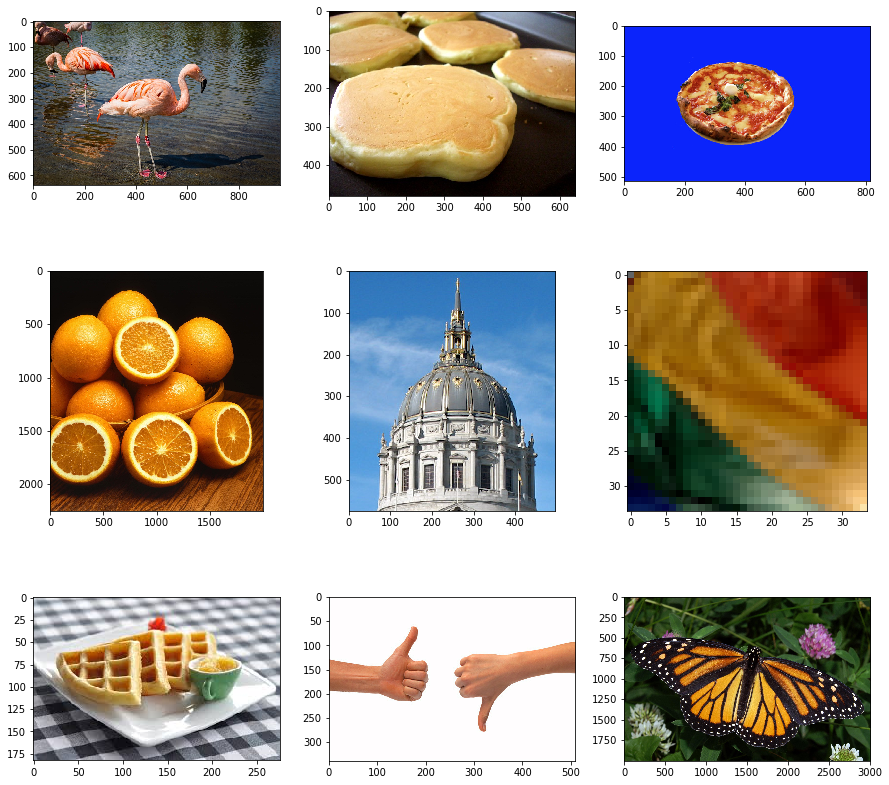

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob


%matplotlib inline

# Read in the images
images = [cv2.imread(file) for file in glob.glob("images/*") if not file.startswith('images/snap')]

# Change color to RGB (from BGR)
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

def plot_images(images):
    w=15
    h=15
    fig=plt.figure(figsize=(w, h))
    columns = 3
    rows = 3

    for i in range(1, len(images) + 1):
        img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)

plot_images(images)


### Prepare data for k-means

In [10]:
# Reshape images into a 2D array of pixels and 3 color values (RGB)
# we are going from 2D, color channels in a regualar image to 3 coordinate (x,y,z) in which in coordinate
# represents the intensity of a pixel in the image in R G B space. 
pixel_vals = [img.reshape((-1,3)) for img in images]

# Convert to float type
pixel_vals = [np.float32(pv) for pv in pixel_vals]

### Implement k-means clustering

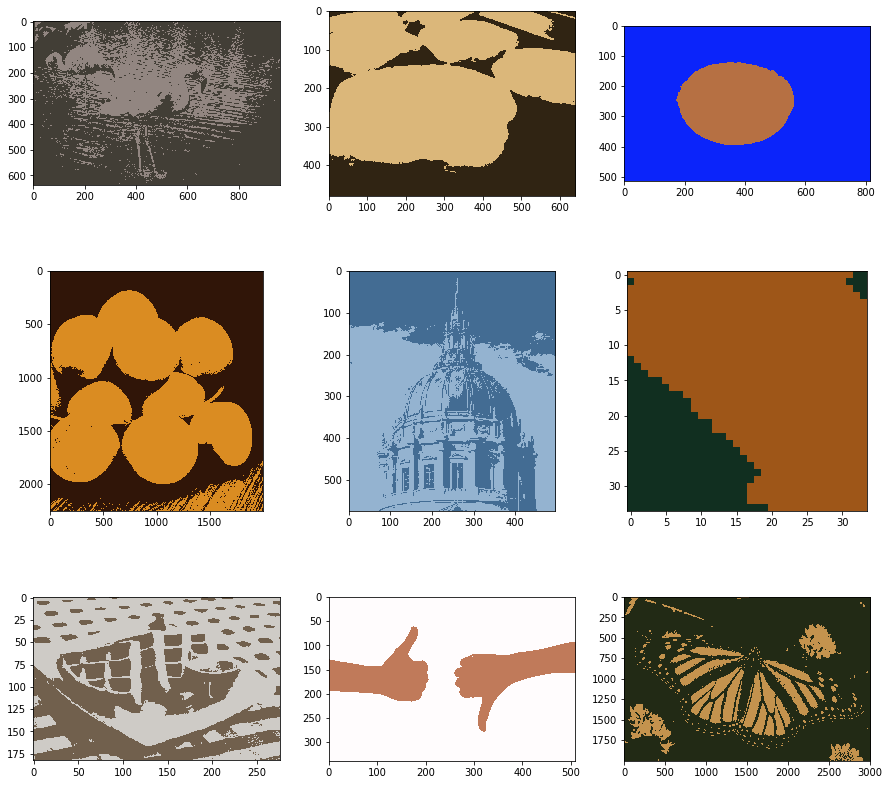

In [21]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## Select a value for k
# then perform k-means clustering
k = 2

retval = []
labels = []
centers = []
segmented_data = []
segmented_images = []
labels_reshape = []

for i in range(len(images)):
    r, l, c = cv2.kmeans(pixel_vals[i], k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    retval.append(r)
    labels.append(l)
    centers.append(c)
    
# convert data into 8-bit values
centers = [np.uint8(c) for c in centers]
# in each image all pixels in a cluster get the value of their cluster center center. 
# so if we have 2 clusters, we will end up wit the entire image being represented by 2 colors
# all pixels belonging to center 1, get the intensity R, G B of the their cluster center 1, and same goes to all
# pixels belonging to cluster 2. 
# cluster of 1 represent an average color of the entire images. 
for i in range(len(images)):    
    segmented_data.append(centers[i][labels[i].flatten()])

# reshape data into the original image dimensions
for i in range(len(images)):    
    segmented_images.append(segmented_data[i].reshape((images[i].shape)))
    labels_reshape.append(labels[i].reshape(images[i].shape[0], images[i].shape[1]))

plot_images(segmented_images)

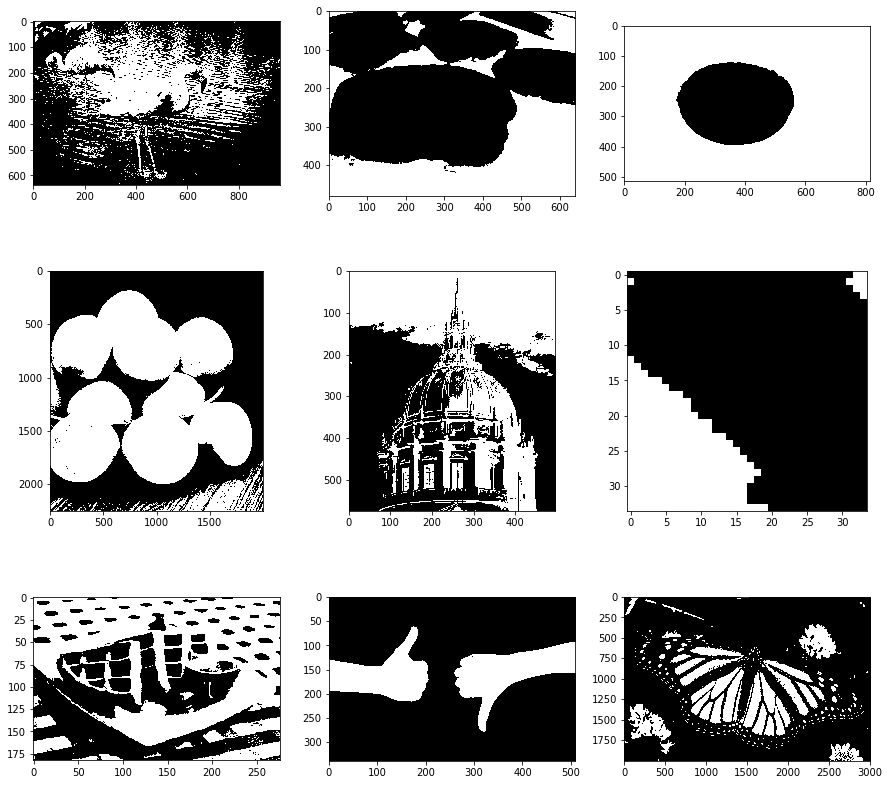

In [22]:
## Visualize one segment, try to find which is the leaves, background, etc!

def plot_segment(images):
    w=15
    h=15
    fig=plt.figure(figsize=(w, h))
    columns = 3
    rows = 3
    for i in range(1, len(images) + 1):
        img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img==0, cmap='gray')

plot_segment(labels_reshape)

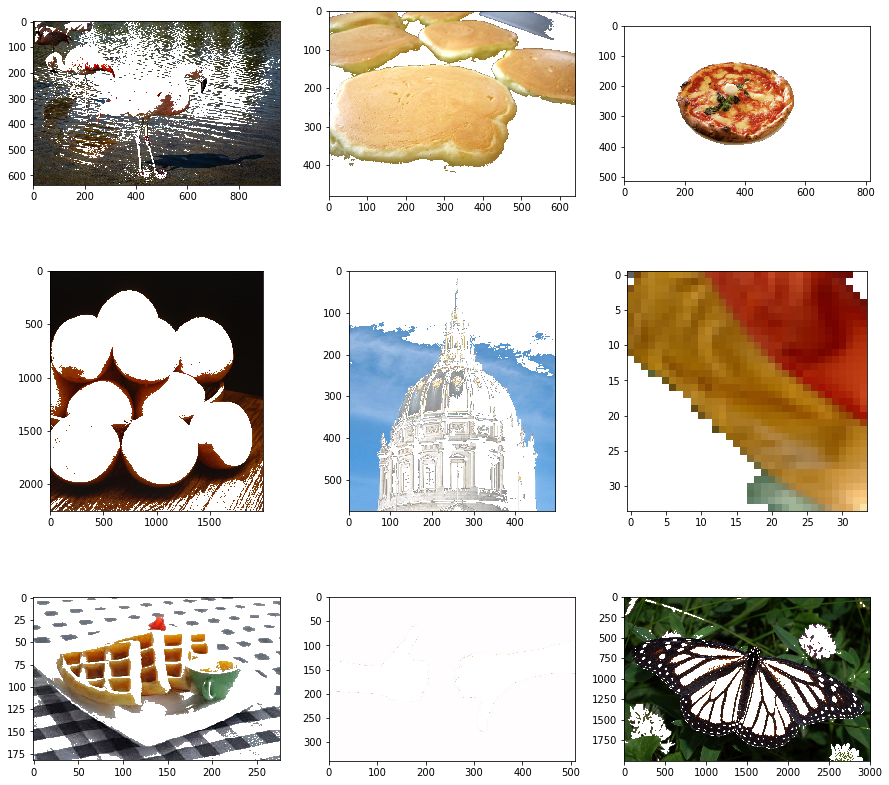

In [26]:
# mask the images segment by cluster

cluster = 0 # the first cluster

masked_images = [np.copy(img) for img in images]

# turn the mask into a color!
for i in range(len(images)):
    masked_images[i][labels_reshape[i] == cluster] = [255, 255, 255]

plot_images(masked_images)